In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.3 MB/s eta 0:00:00


In [2]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.7 MB/s eta 0:00:00


In [3]:
!pip install gymnasium["all"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 686.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 15.2 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376423 sha256=cded175862304f803052aa9b1a7eaa3c2d78793ed8d875c0e49b876db7610904
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env

In [5]:
class PlotCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.rewards = []
        self.losses = []
        self.returns = []

    def _on_step(self) -> bool:
        if hasattr(self.model, 'logger'):
            loss = self.model.logger.name_to_value.get('train/loss', np.nan)
            if not np.isnan(loss):
                self.losses.append(loss)
        return True

    def _on_rollout_end(self) -> None:
        # Log rewards and calculate returns at the end of each episode
        if hasattr(self.model, 'ep_info_buffer') and self.model.ep_info_buffer:
            for ep_info in self.model.ep_info_buffer:
                self.rewards.append(ep_info['r'])

        self.model.ep_info_buffer.clear()

In [6]:
env = gym.make('Pusher-v5')

In [8]:
gamma = 0.99
learning_rate = 0.0001

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# implement td3 on pusher
from stable_baselines3 import TD3

In [10]:
model = TD3('MlpPolicy', env, verbose=1, gamma=gamma, learning_rate=learning_rate)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
callback = PlotCallback()
training_history = model.learn(total_timesteps=200000, callback=callback, log_interval=1000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -40.8    |
| time/              |          |
|    episodes        | 1000     |
|    fps             | 31       |
|    time_elapsed    | 3137     |
|    total_timesteps | 100000   |
| train/             |          |
|    actor_loss      | 67.9     |
|    critic_loss     | 0.124    |
|    learning_rate   | 0.0001   |
|    n_updates       | 99899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -41.7    |
| time/              |          |
|    episodes        | 2000     |
|    fps             | 31       |
|    time_elapsed    | 6276     |
|    total_timesteps | 200000   |
| train/             |          |
|    actor_loss      | 66       |
|    critic_loss     | 0.075    |
|    learning_rate   | 0.0001   |
|    n_updates       | 199899   |
--------------

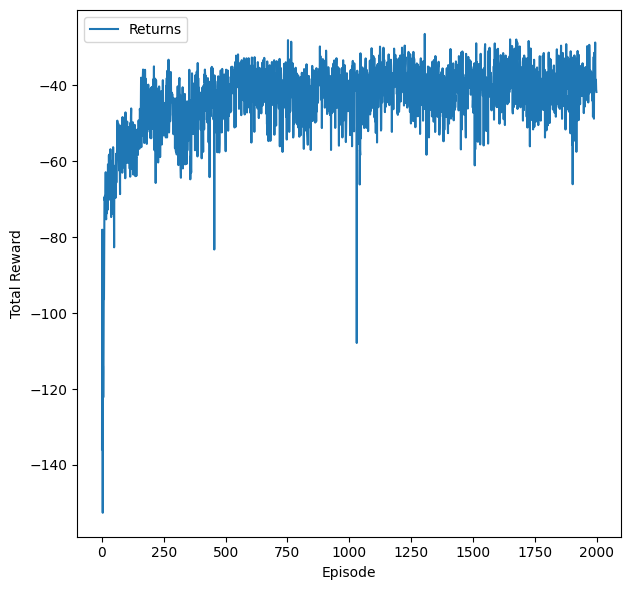

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(callback.rewards, label="Returns")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.legend()

plt.tight_layout()
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Calculating MSE for TD3...


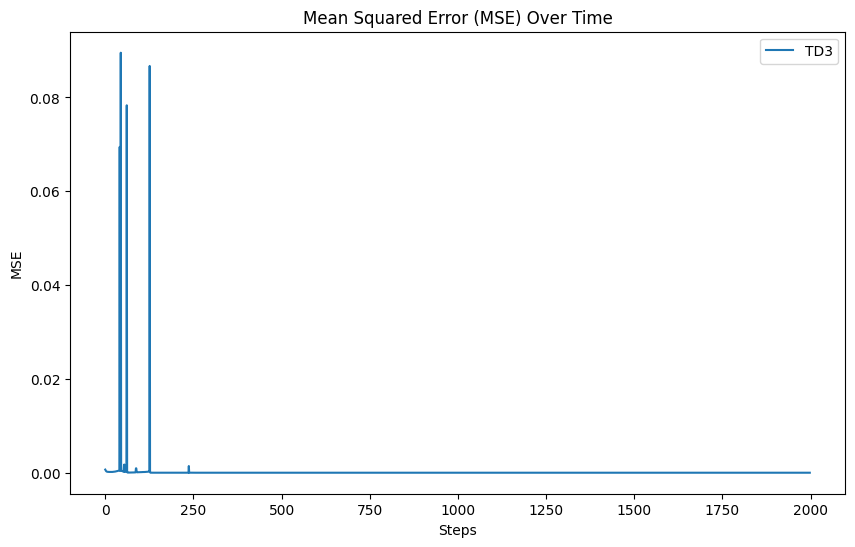

In [13]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(model, env, num_steps=100):
    obs, _ = env.reset()
    predicted_actions = []
    true_states = []
    mse_values = []

    for step in range(num_steps):
        action, _ = model.predict(obs, deterministic=True)  # Predict action
        predicted_actions.append(action)
        true_states.append(obs)

        # Take the action in the environment
        obs, reward, done, _, _ = env.step(action)

        # Compute MSE between predicted actions and observed state differences
        if step > 0:
            mse = np.mean((true_states[-1] - true_states[-2]) ** 2)
            mse_values.append(mse)

        if done:
            obs, _ = env.reset()

    return mse_values

models = {
    'TD3': TD3('MlpPolicy', env, verbose=1)
}
# Generate MSE values for each model
mse_data = {}
for model_name, model in models.items():
    print(f"Calculating MSE for {model_name}...")
    mse_data[model_name] = calculate_mse(model, env, num_steps=2000)

# Plotting the MSE values
plt.figure(figsize=(10, 6))
for model_name, mse_values in mse_data.items():
    plt.plot(range(len(mse_values)), mse_values, label=model_name)

plt.xlabel("Steps")
plt.ylabel("MSE")
plt.title("Mean Squared Error (MSE) Over Time")
plt.legend()
plt.show()

env.close()

In [14]:
model.save("/content/td3_pusher_lrless_gammalarge")